In [3]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import json
import os
#import readability
import textstat
import matplotlib.pyplot as plt
import numpy as np

countFile = 0
countPolicyText = 0
db={}
formulas = ["FKG", "FRES", "NDC", "GFI", "SMOG"]
northeastStates = ["ME", "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
southStates = ["MD", "DE", "WV", "VA", "KY", "NC", "TN", "SC", "GA", "FL", "AL", "MS", "AR", "LA", "OK", "TX"]
midwestStates = ["OH", "MI", "IN", "WI", "IL", "MN", "IA", "MO", "ND", "SD", "NE", "KS"]
westStates = ["MT", "WY", "CO", "NM", "ID", "UT", "AZ", "WA", "OR", "CA"]



FKGScores = {}
FRESScores = {}
NDCScores = {}
GFIScores = {}
SMOGScores = {}

#Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
#step = 1
for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        #print(os.path.join(dirPath, f))
        #print(dirPath[36:])
        #print(dirNames)
        if f == "privacy_policy.json":
            countFile += 1
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                for key1, value1 in data.items():
                    for element in value1:
                        #print(dirPath[36:])
                        #print(element["policy_text"])
                        stateName = dirPath[33:35]
                        try:
                            FKG = textstat.flesch_kincaid_grade(element["policy_text"])
                            FRES = textstat.flesch_reading_ease(element["policy_text"])
                            NDC = textstat.dale_chall_readability_score(element["policy_text"])
                            GFI = textstat.gunning_fog(element["policy_text"])
                            SMOG = textstat.smog_index(element["policy_text"])
                            record = {'FKG':FKG, 'FRES':FRES, 'NDC':NDC, 'GFI':GFI, 'SMOG':SMOG}
                            #db[dirPath[36:]] = record
                            print(dirPath[36:])
                            print(FKG, FRES, NDC, GFI, SMOG)
                            countPolicyText += 1
                            
                            FKGScores[dirPath[36:]] = FKG
                            FRESScores[dirPath[36:]] = FRES
                            NDCScores[dirPath[36:]] = NDC
                            GFIScores[dirPath[36:]] = GFI
                            SMOGScores[dirPath[36:]] = SMOG
                            
                            if stateName in northeastStates:
                                region = "NorthEast"
                            elif stateName in southStates:
                                region = "South"
                            elif stateName in midwestStates:
                                region = "MidWest"
                            elif stateName in westStates:
                                region = "West"
                            
                            record["region"] = region
                            db[dirPath[36:]] = record
                            #print(score)
                            #db[dirPath[36:]] = score
                            """
                                score = readability.getmeasures(element["policy_text"], lang="en")
                                
                                #print(dirPath[36:])
                                #print(score['readability grades']['FleschReadingEase'])
                                
                                if score['readability grades']['FleschReadingEase'] < 0:
                                    print(dirPath[36:])
                                    print(score['readability grades']['FleschReadingEase'])
                                
                                db[dirPath[36:]] = score['readability grades']['FleschReadingEase']
                                #for key2, value2 in element.items():
                                #    print(0)
                                """
                        except:
                            if dirPath[36:] not in db:
                                print(dirPath[36:])
                                print("None")
                                #pass
                                #db[dirPath[36:]] = None
                            #pass
                    break
                    print(0)

Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
count = [0,0,0,0,0]
countNDC = 0
for key, value in db.items():
    if value["FKG"] >= 8:
        count[0] += 1
    if value["FRES"] <= 70:
        count[1] += 1
    if value["NDC"] >= 6.9:
        count[2] += 1
    if value["GFI"] >= 8:
        count[3] += 1
    if value["SMOG"] >= 8:
        count[4] += 1

"""
print("Above 8th grade")
print("FKG: ", count[0]/countPolicyText)
print("FRES: ", count[1]/countPolicyText)
print("NDC: ", count[2]/countPolicyText)
print("GFI: ", count[3]/countPolicyText)
print("SMOG: ", count[4]/countPolicyText)
"""


##################

#category = {}
categories = {}

for key1, value1 in Scores.items():
    category = {}
    category.clear()
    if key1 != "FRESScores":
        #category = {}
        for key2, value2 in value1.items():
            for i in range(0,50,1):
                if value2 < i:
                    category_Name = "[" + str(i) + "," + str(i+1) + ")"
                    if category_Name in category:
                        category[category_Name] += 1
                    else:
                        category[category_Name] = 1
                    break
            #print(key1)
            #print(category)
        if key1 == "FKGScores":
            categories["FKGScores"] = category
        elif key1 == "NDCScores":
            categories["NDCScores"] = category
        elif key1 == "GFIScores":
            categories["GFIScores"] = category
        elif key1 == "SMOGScores":
            categories["SMOGScores"] = category
    else:
        #category = {}
        for key2, value2 in value1.items():
            for i in range(0,100,10):
                if value2 < i:
                    category_Name = "[" + str(i) + "," + str(i+10) + ")"
                    if category_Name in category:
                        category[category_Name] += 1
                    else:
                        category[category_Name] = 1
                    break
            #print(category)
        if key1 == "FRESScores":
            categories["FRESScores"] = category



"""
northeast = []
south = []
midwest = []
west = []

for key1, value1 in db.items():
    if value1["region"] == "northeast":
        
    elif value1["region"] == "south":
        
    elif value1["region"] == "midwest":
        
    elif value1["region"] == "west":
        
    
    
    value1["FKG"]
    value1["FRES"]
    value1["GFI"]
    value1["NDC"]
    value1["SMOG"]
"""


ty-Stanislaus
18.9 20.05 7.75 17.52 19.6
ty-Stanislaus
None
Berkeley
17.6 34.22 7.29 17.23 18.2
Berkeley
None

14.2 32.22 10.47 19.71 0.0

None
sity
14.2 32.22 10.47 19.71 0.0
sity
None
-Fort Collins
16.3 37.57 7.84 17.26 16.2
-Fort Collins
None
nverAnschutz Medical Campus
25.5 13.62 10.9 28.41 0.0
nverAnschutz Medical Campus
None
ty
46.3 -62.05 11.52 44.06 36.4
ty
None
ty
24.4 0.32 10.18 24.43 23.0
ty
None
 Urbana-Champaign
15.9 33.28 7.43 14.91 17.2
 Urbana-Champaign
None
y
19.1 25.05 8.25 18.85 19.1
y
None
 Institute of Technology
None
sity
13.6 33.75 10.43 16.0 15.2
sity
None
anoa
27.9 1.91 9.26 27.69 23.3
anoa
None
ilo
17.3 29.52 8.38 18.65 0.0
ilo
None
y
None

9.9 54.22 7.96 12.09 13.0

None

None
rt Smith
17.3 29.52 10.06 18.65 0.0
rt Smith
None
y
15.6 44.71 8.41 17.25 15.3
y
None
y
26.0 12.3 9.96 27.43 19.9
y
None
Liberal Arts
25.6 13.32 9.79 27.46 21.6
Liberal Arts
None
nnsylvania
11.5 44.75 9.35 14.98 0.0
nnsylvania
None
f Pennsylvania
None

None
gton
11.8 38.52 9.18 14.57 13

'\nnortheast = []\nsouth = []\nmidwest = []\nwest = []\n\nfor key1, value1 in db.items():\n    if value1["region"] == "northeast":\n        \n    elif value1["region"] == "south":\n        \n    elif value1["region"] == "midwest":\n        \n    elif value1["region"] == "west":\n        \n    \n    \n    value1["FKG"]\n    value1["FRES"]\n    value1["GFI"]\n    value1["NDC"]\n    value1["SMOG"]\n'

In [1]:
plt.rcParams.update({'font.size': 16})
for key1, value1 in categories.items():
    x = list(value1.keys())
    y = []
    x.sort()    
    for key2 in x:
        y.append(value1[key2])

    fig = plt.figure(figsize=(18,8))
    plt.bar(x, y)
    plt.xlabel("Readability Score")
    plt.ylabel("Number of Occurances")
    plt.title(f"{key1} Readability Scores of Privacy Policies")

    plt.savefig(f'../figures/readability-score-{key1}.png')

    #plt.tick_params(axis='x', labelsize=4)
    #fig = plt.figure(figsize=(12,4))
    plt.show()

NameError: name 'plt' is not defined

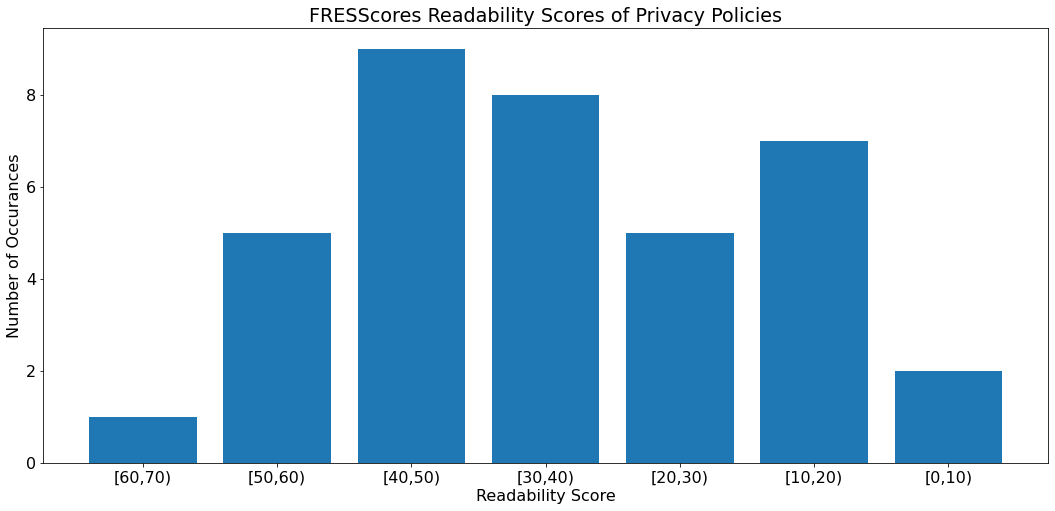

In [29]:
plt.rcParams.update({'font.size': 16})
key = 'FRESScores'
scores = categories[key]

x = list(categories[key].keys())
y = []
x.sort(reverse=True)    
for key2 in x:
    y.append(scores[key2])

fig = plt.figure(figsize=(18,8))
plt.bar(x, y)
plt.xlabel("Readability Score")
plt.ylabel("Number of Occurances")
plt.title(f"{key} Readability Scores of Privacy Policies")

plt.savefig(f'../figures/readability-score-{key}.png')

#plt.tick_params(axis='x', labelsize=4)
#fig = plt.figure(figsize=(12,4))
plt.show()